# Logistic Regression 

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data = 'assignment_08_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
number_data = data.shape[0]

point_x = data[:, 0]
point_y = data[:, 1]
label   = data[:, 2]

print('number of data = ', number_data)
print('data type of point x = ', point_x.dtype)
print('data type of point y = ', point_y.dtype)

point_x_class_0 = point_x[label == 0]
point_y_class_0 = point_y[label == 0]

point_x_class_1 = point_x[label == 1]
point_y_class_1 = point_y[label == 1]

number of data =  600
data type of point x =  float64
data type of point y =  float64


## plot the data

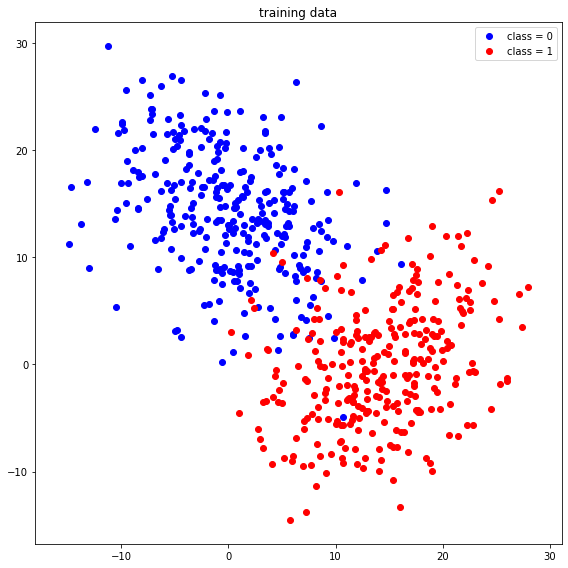

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('training data')
plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \theta_2)$
- point = $(1, x, y) \in \mathbb{R}^3$

In [4]:
def compute_linear_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    value = np.matmul(theta, point.T) # (3,) (600,3) -> (600,)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [5]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    value = 1 / (1 + np.exp(-z))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point = $(1, x, y) \in \mathbb{R}^3$

In [6]:
def compute_logistic_regression(theta, point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    value = sigmoid(compute_linear_regression(theta, point))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (x, y) \in \mathbb{R}^2$
- label $= l \in \{0, 1\}$

In [7]:
def compute_residual(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    residual = (- 1) * (label * np.log(compute_logistic_regression(theta, point)) + (np.ones(label.shape[0])-label) * (np.log(np.ones(label.shape[0])-compute_logistic_regression(theta, point))))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [8]:
def compute_loss(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    loss = np.sum(compute_residual(theta, point, label)) / (label.shape[0])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \theta_2) \in \mathbb{R}^3$
- point $= (1, x, y) \in \mathbb{R}^3$
- label $= l \in \{0, 1\}$

In [9]:
def compute_gradient(theta, point, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label = label.squeeze()
    gradient = (np.matmul(np.multiply(np.ones(label.shape[0]) - label, compute_logistic_regression(theta, point)), point) + np.matmul(np.multiply(label, compute_logistic_regression(theta, point) - np.ones(label.shape[0])), point)) / label.shape[0]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## initialize the gradient descent algorithm

In [10]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

number_point_class_0    = len(point_x_class_0)
number_point_class_1    = len(point_x_class_1)

point_class_0   = np.ones((number_point_class_0, 3))
point_class_1   = np.ones((number_point_class_1, 3))

point_class_0[:, 1] = point_x_class_0
point_class_0[:, 2] = point_y_class_0
 
point_class_1[:, 1] = point_x_class_1
point_class_1[:, 2] = point_y_class_1

label_0     = np.zeros(number_point_class_0)
label_1     = np.ones(number_point_class_1)

point = np.concatenate((point_class_0, point_class_1), axis=0)
label = np.concatenate((label_0, label_1), axis=0)

print('shape of point_class_0 : ', point_class_0.shape)
print('shape of point_class_1 : ', point_class_1.shape)
print('shape of label_0 : ', label_0.shape)
print('shape of label_1 : ', label_1.shape)

print('shape of point : ', point.shape)
print('shape of label : ', label.shape)

shape of point_class_0 :  (300, 3)
shape of point_class_1 :  (300, 3)
shape of label_0 :  (300,)
shape of label_1 :  (300,)
shape of point :  (600, 3)
shape of label :  (600,)


## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [11]:
for i in range(num_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    
    theta   = theta - learning_rate * compute_gradient(theta, point, label)
    loss    = compute_loss(theta, point, label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    theta_iteration[i, :]   = theta
    loss_iteration[i]       = loss

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [12]:
def function_result_01():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_linear_regression(input1, input2)
    
    print(value)

In [13]:
def function_result_02():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])

    value = compute_logistic_regression(input1, input2)

    print(value)

In [14]:
def function_result_03():

    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([0, 1])

    value = compute_residual(input1, input2, input3)

    print(value)

In [15]:
def function_result_04():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_loss(input1, input2, input3)

    print(value)

In [16]:
def function_result_05():
    
    input1  = np.array([0.1, 0.2, 0.3])
    input2  = np.array([[1, 2, 3], [1, -2, -3]])
    input3  = np.array([[0], [1]])

    value = compute_gradient(input1, input2, input3)

    print(value)

In [17]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [18]:
def function_result_07():
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    plt.plot(theta_iteration[:, 0], '-', color='red', label=r'$\theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label=r'$\theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label=r'$\theta_2$')
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [19]:
def function_result_08():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    f = plt.figure(figsize=(8,8))
    plt.axis('equal')
    YY = np.flip(YY)

    plt.title('linear regression values')
    plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0', markersize=3)
    plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1', markersize=3)
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.tight_layout()
    
    ZZ = theta_optimal[0] + theta_optimal[1] * XX + theta_optimal[2] * YY
    extent = -20, 35, -20, 35
    
    # plt.plot(XX,YY)
    
    # plt.scatter(X, - (theta_optimal[0] + theta_optimal[1] * X) / theta_optimal[2], s=1, c='black')
    plt.scatter( - (theta_optimal[0] + theta_optimal[2] * Y) / theta_optimal[1], Y,s=1, c='black')
    
    boundary_ = np.arange(-20,22.5,0.0125*42.5).tolist()
    plt.imshow(ZZ, cmap=cm.RdBu_r, extent=extent, alpha = 1, norm=colors.BoundaryNorm(boundaries=boundary_, ncolors=256))
    plt.colorbar(ticks = [-22.5,-18.0,-13.5,-9.0,-4.5,0.0,4.5,9.0,13.5,18])
    plt.clim(-22.5,22.5)
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

## plot the logistic regression values over the 2-dimensional Euclidean space

In [20]:
def function_result_09():

    X = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(-20, 35, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    f = plt.figure(figsize=(8,8))
    plt.axis('equal')
    YY = np.flip(YY)

    plt.title('logistic regression values')
    plt.plot(point_x_class_0, point_y_class_0, 'o', color='blue', label='class = 0', markersize=3)
    plt.plot(point_x_class_1, point_y_class_1, 'o', color='red', label='class = 1', markersize=3)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    ZZ = theta_optimal[0] + theta_optimal[1] * XX + theta_optimal[2] * YY
    ZZ = sigmoid(ZZ)
    extent = -20, 35, -20, 35
    
    # plt.plot(XX,YY)
    boundary_ = np.arange(0,1,0.0125).tolist()
    plt.imshow(ZZ, cmap=cm.RdBu_r, extent=extent, alpha = 1, norm=colors.BoundaryNorm(boundaries=boundary_, ncolors=256))
    plt.colorbar(ticks = [0,0.11,0.22,0.33,0.44,0.55,0.66,0.77,0.88,0.99])
    plt.clim(0,1)
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
[ 1.4 -1.2]
**************************************************
## [RESULT 02]
**************************************************
[0.80218389 0.23147522]
**************************************************
## [RESULT 03]
**************************************************
[1.62041741 1.46328247]
**************************************************
## [RESULT 04]
**************************************************
1.783699877256482
**************************************************
## [RESULT 05]
**************************************************
[0.01682955 1.57070867 2.35606301]
**************************************************
## [RESULT 06]
**************************************************


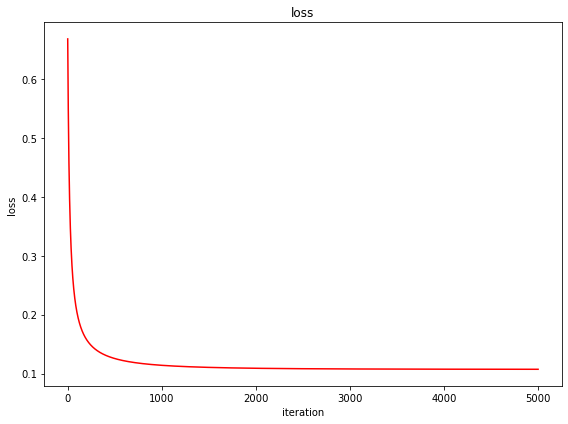

**************************************************
## [RESULT 07]
**************************************************


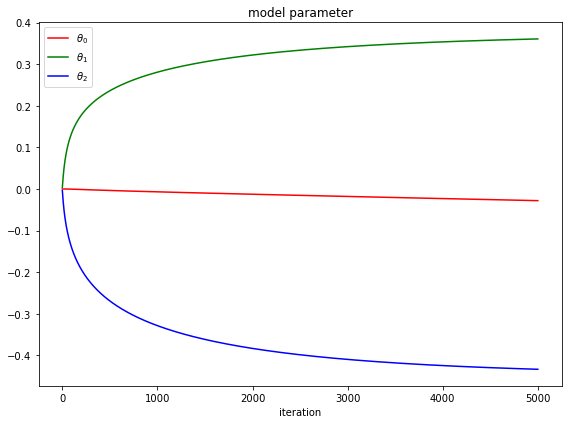

**************************************************
## [RESULT 08]
**************************************************


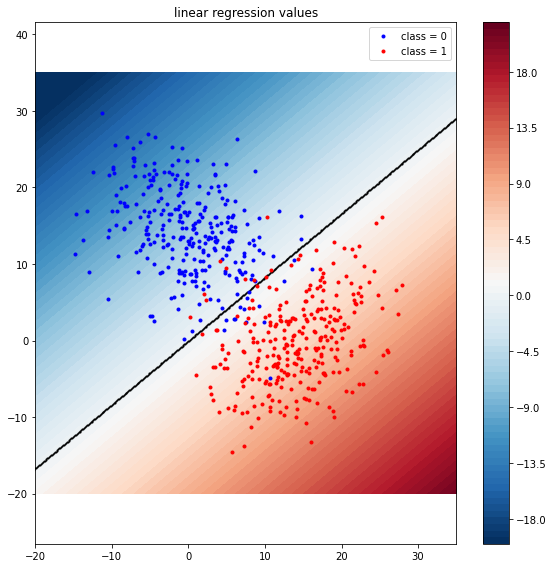

**************************************************
## [RESULT 09]
**************************************************


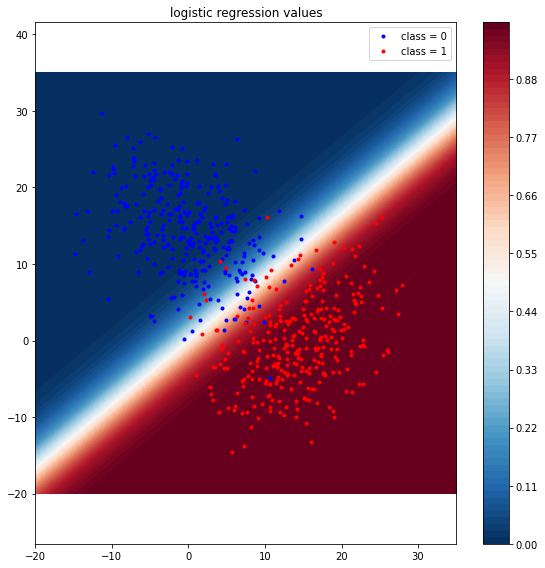

In [21]:
number_result = 9

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)